In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import textwrap
from scipy import stats
from scipy.stats import f_oneway

In [86]:
df = pd.read_csv("clean_kaggle_data.csv")

C:\Users\Derick\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (207) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


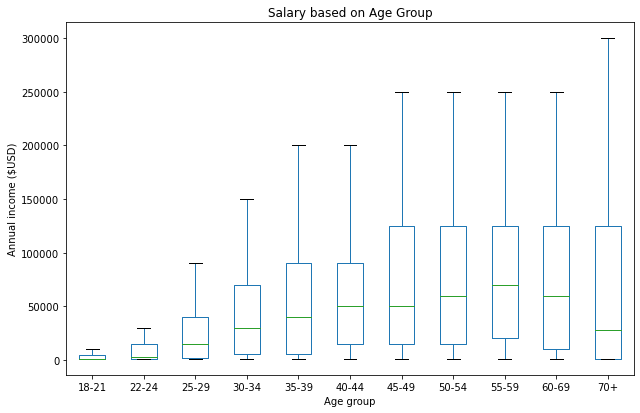

In [87]:
# Q1

# salary based on age group plot

df1 = df[['Q1', 'Q24']]
ax = df1.boxplot(column='Q24', by='Q1', grid=False, showfliers=False, figsize=(9,6))
plt.title('Salary based on Age Group')
plt.suptitle('')
ax.set_xlabel("Age group")
ax.set_ylabel("Annual income ($USD)")
plt.tight_layout()
plt.show()

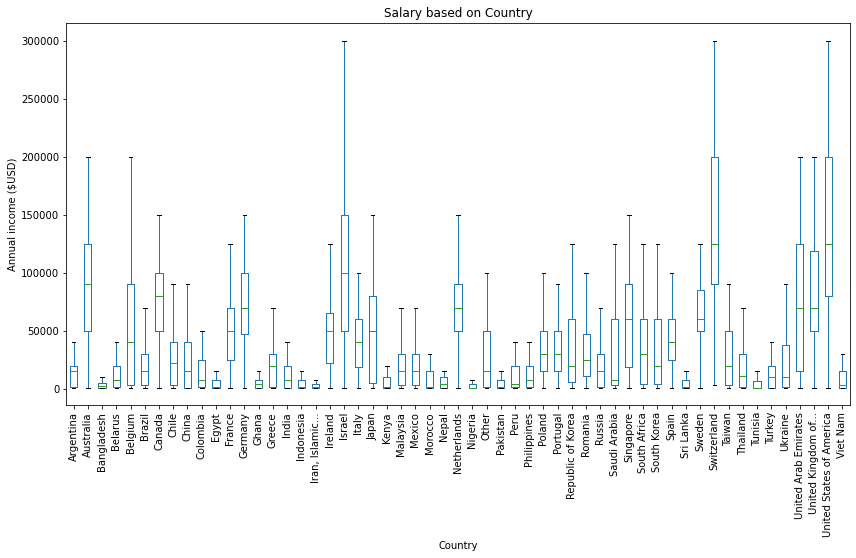

In [88]:
# salary based on country plot

pd.set_option('mode.chained_assignment',None)
df2 = df[['Q3', 'Q24']]
for i in range(10728):
    df2['Q3'][i] = textwrap.shorten(df2['Q3'][i], width=24, placeholder="...")
    
ax = df2.boxplot(column='Q24', by='Q3', grid=False, showfliers=False, figsize=(12,8), rot=90)
plt.title('Salary based on Country')
plt.suptitle('')
ax.set_xlabel("Country")
ax.set_ylabel("Annual income ($USD)")
plt.tight_layout()
plt.show()

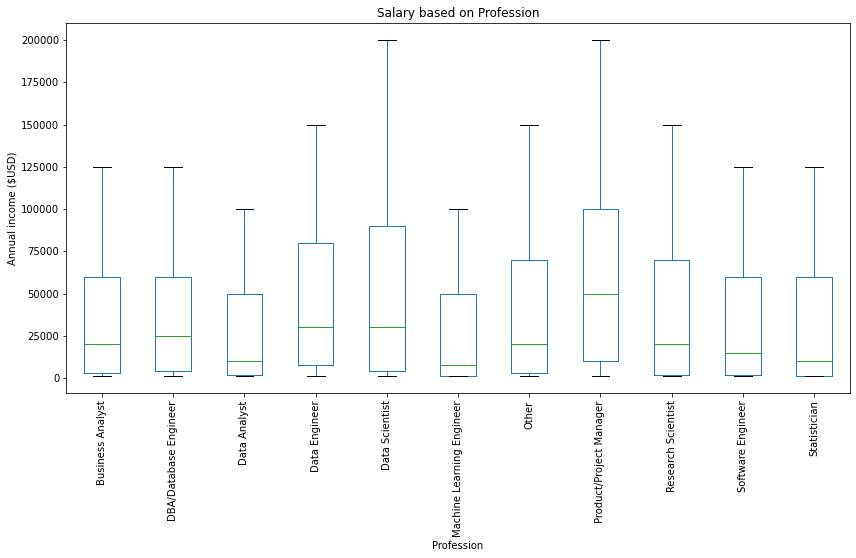

In [89]:
# salary based on profession plot

df3 = df[['Q5', 'Q24']]
ax = df3.boxplot(column='Q24', by='Q5', grid=False, showfliers=False, figsize=(12,8), rot=90)
plt.title('Salary based on Profession')
plt.suptitle('')
ax.set_xlabel("Profession")
ax.set_ylabel("Annual income ($USD)")
plt.tight_layout()
plt.show()

In [90]:
# Q2a

# descriptive statistics for male salary

df_male = df[['Q2', 'Q24']]
df_male = df_male[df_male['Q2']=='Man']
print('Salaries of men:')
df_male.describe()

Salaries of men:


,Q24
count,8872.000000
mean,50750.619928
std,70347.974812
min,1000.000000
25%,3000.000000
50%,25000.000000
75%,70000.000000
max,500000.000000


In [91]:
# descriptive statistics for female salary

df_female = df[['Q2', 'Q24']]
df_female = df_female[df_female['Q2']=='Woman']
print('Salaries of women:')
df_female.describe()

Salaries of women:


,Q24
count,1683.000000
mean,36417.112299
std,59442.716093
min,1000.000000
25%,1000.000000
50%,7500.000000
75%,50000.000000
max,500000.000000


In [92]:
# Q2b

# 2-sample t-test comparing average male salary and female salary

male_income = df_male['Q24']
female_income = df_female['Q24']
tc, pc = stats.ttest_ind(female_income, male_income)
print('2-sample t-test comparing average male salary and female salary:')
print ("t-test: t = %g  p = %g" % (tc, pc))

2-sample t-test comparing average male salary and female salary:
t-test: t = -7.84433  p = 4.77315e-15


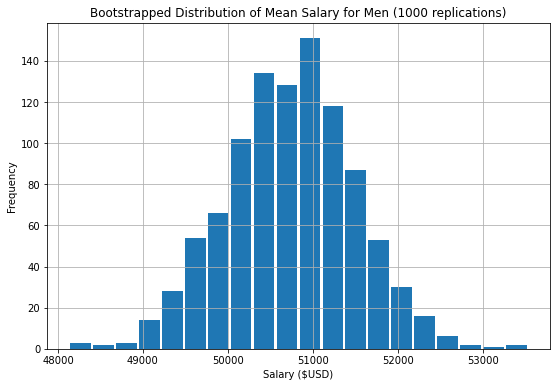

In [93]:
# Q2c

# bootstrapping distribution plot for male mean salary

male_array = male_income.to_numpy()
male_mean_array = []

for i in range(1000):
    
    np.random.seed(i)
    bootstrap_array = np.random.choice(male_array, size = 8872)
    male_mean_array.append(np.mean(bootstrap_array))

male_mean_array = np.asarray(male_mean_array)
male_mean_series = pd.Series(male_mean_array)

ax = male_mean_series.hist(bins = 20, rwidth=0.9, figsize=(9,6))
plt.title('Bootstrapped Distribution of Mean Salary for Men (1000 replications)')
ax.set_xlabel("Salary ($USD)")
ax.set_ylabel("Frequency")
plt.show()

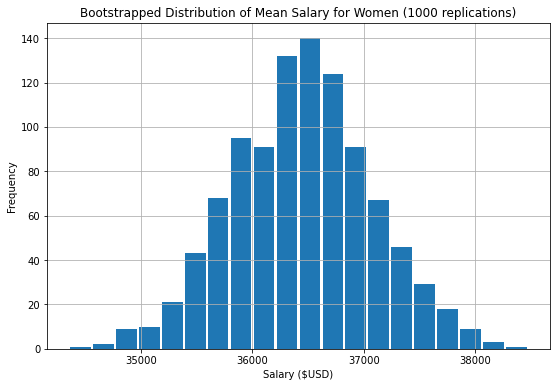

In [94]:
# bootstrapping distribution plot for female mean salary

female_array = female_income.to_numpy()
female_mean_array = []

for i in range(1000):
    
    np.random.seed(1000+i)
    bootstrap_array = np.random.choice(female_array, size = 8872)
    female_mean_array.append(np.mean(bootstrap_array))

female_mean_array = np.asarray(female_mean_array)
female_mean_series = pd.Series(female_mean_array)

ax = female_mean_series.hist(bins = 20, rwidth=0.9, figsize=(9,6))
plt.title('Bootstrapped Distribution of Mean Salary for Women (1000 replications)')
ax.set_xlabel("Salary ($USD)")
ax.set_ylabel("Frequency")
plt.show()

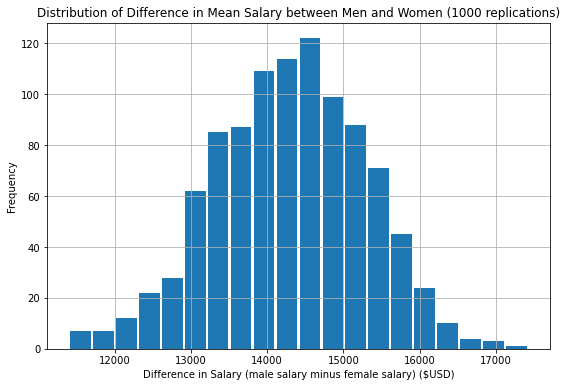

In [95]:
# distribution of difference in mean salary between men and women

diff_array = male_mean_array - female_mean_array
diff_series = pd.Series(diff_array)

ax = diff_series.hist(bins = 20, rwidth=0.9, figsize=(9,6))
plt.title('Distribution of Difference in Mean Salary between Men and Women (1000 replications)')
ax.set_xlabel("Difference in Salary (male salary minus female salary) ($USD)")
ax.set_ylabel("Frequency")
plt.show()

In [96]:
# Q2d

# 2-sample t-test comparing average male salary and female salary using bootstrapped data

male_income = male_mean_series
female_income = female_mean_series
tc, pc = stats.ttest_ind(female_income, male_income)
print('2-sample t-test comparing average male salary and female salary using bootstrapped data:')
print ("t-test: t = %g  p = %g" % (tc, pc))

2-sample t-test comparing average male salary and female salary using bootstrapped data:
t-test: t = -458.916  p = 0


In [97]:
# Q3a

# descriptive statistics for salary of bachelor degree holders

df_bachelor = df[['Q4', 'Q24']]
df_bachelor = df_bachelor[df_bachelor['Q4']=='Bachelor’s degree']
print('Bachelor degree:')
df_bachelor.describe()

Bachelor degree:


,Q24
count,3013.000000
mean,35732.824427
std,60247.753546
min,1000.000000
25%,1000.000000
50%,10000.000000
75%,50000.000000
max,500000.000000


In [98]:
# descriptive statistics for salary of master degree holders

df_master = df[['Q4', 'Q24']]
df_master = df_master[df_master['Q4']=='Master’s degree']
print('Master degree:')
df_master.describe()

Master degree:


,Q24
count,4879.000000
mean,52120.106579
std,67681.571528
min,1000.000000
25%,4000.000000
50%,25000.000000
75%,70000.000000
max,500000.000000


In [99]:
# descriptive statistics for salary of doctoral degree holders

df_doctor = df[['Q4', 'Q24']]
df_doctor = df_doctor[df_doctor['Q4']=='Doctoral degree']
print('Doctoral degree:')
df_doctor.describe()

Doctoral degree:


,Q24
count,1718.000000
mean,68719.441211
std,85403.650394
min,1000.000000
25%,5000.000000
50%,40000.000000
75%,90000.000000
max,500000.000000


In [100]:
# Q3b

# 3-sample ANOVA test comparing average salary among people with different degrees

bachelor_income = df_bachelor['Q24'].to_numpy()
master_income = df_master['Q24'].to_numpy()
doctor_income = df_doctor['Q24'].to_numpy()
F, p = f_oneway(bachelor_income, master_income, doctor_income)

print('3-sample ANOVA test comparing average salary among people with different degrees:')
print ("F-test: F = %g  p = %g" % (F, p))

3-sample ANOVA test comparing average salary among people with different degrees:
F-test: F = 129.756  p = 2.48521e-56


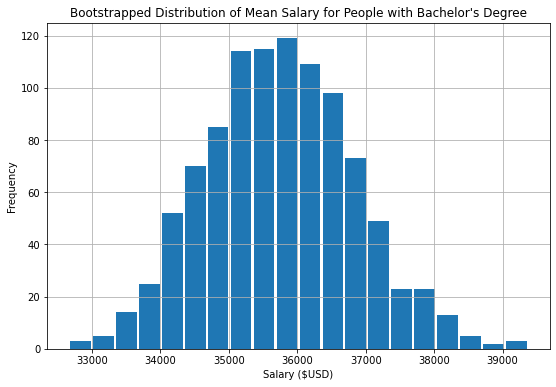

In [101]:
# Q3c

# bootstrapping distribution plot for mean salary of bachelor degree holders

bachelor_mean_array = []

for i in range(1000):
    
    np.random.seed(2000+i)
    bootstrap_array = np.random.choice(bachelor_income, size = 3013)
    bachelor_mean_array.append(np.mean(bootstrap_array))

bachelor_mean_array = np.asarray(bachelor_mean_array)
bachelor_mean_series = pd.Series(bachelor_mean_array)

ax = bachelor_mean_series.hist(bins = 20, rwidth=0.9, figsize=(9,6))
plt.title('Bootstrapped Distribution of Mean Salary for People with Bachelor\'s Degree')
ax.set_xlabel("Salary ($USD)")
ax.set_ylabel("Frequency")
plt.show()

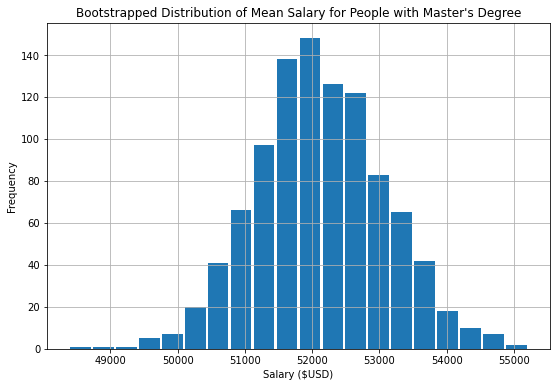

In [102]:
# bootstrapping distribution plot for mean salary of master degree holders

master_mean_array = []

for i in range(1000):
    
    np.random.seed(3000+i)
    bootstrap_array = np.random.choice(master_income, size = 4879)
    master_mean_array.append(np.mean(bootstrap_array))

master_mean_array = np.asarray(master_mean_array)
master_mean_series = pd.Series(master_mean_array)

ax = master_mean_series.hist(bins = 20, rwidth=0.9, figsize=(9,6))
plt.title('Bootstrapped Distribution of Mean Salary for People with Master\'s Degree')
ax.set_xlabel("Salary ($USD)")
ax.set_ylabel("Frequency")
plt.show()

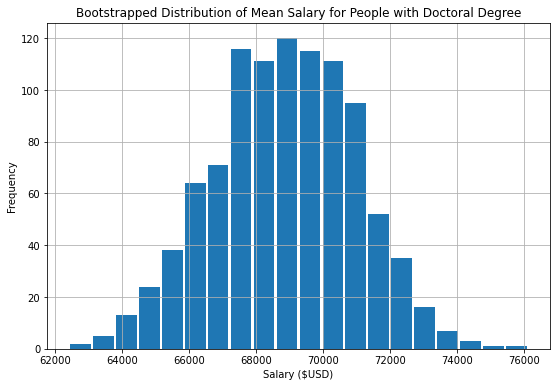

In [103]:
# bootstrapping distribution plot for mean salary of doctoral degree holders

doctor_mean_array = []

for i in range(1000):
    
    np.random.seed(4000+i)
    bootstrap_array = np.random.choice(doctor_income, size = 1718)
    doctor_mean_array.append(np.mean(bootstrap_array))

doctor_mean_array = np.asarray(doctor_mean_array)
doctor_mean_series = pd.Series(doctor_mean_array)

ax = doctor_mean_series.hist(bins = 20, rwidth=0.9, figsize=(9,6))
plt.title('Bootstrapped Distribution of Mean Salary for People with Doctoral Degree')
ax.set_xlabel("Salary ($USD)")
ax.set_ylabel("Frequency")
plt.show()

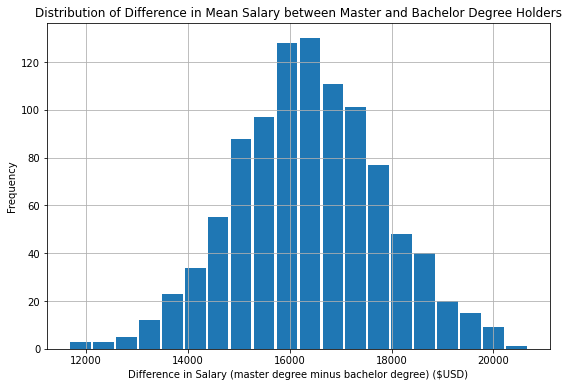

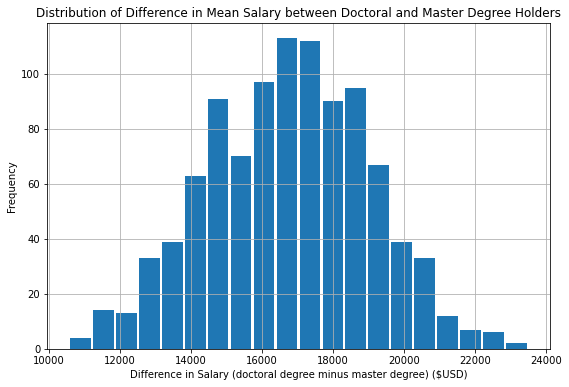

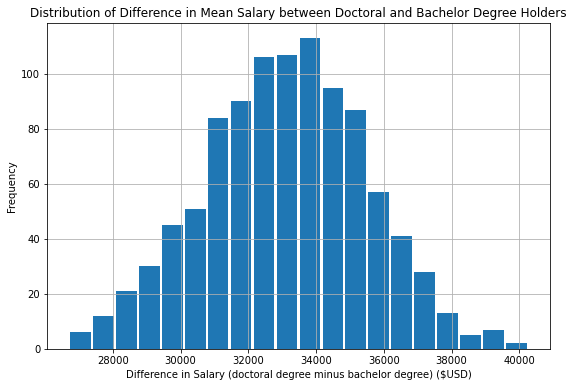

In [104]:
# distribution of difference in mean salary between people with different degrees (3 plots)

diff_array1 = master_mean_array - bachelor_mean_array
diff_array2 = doctor_mean_array - master_mean_array
diff_array3 = doctor_mean_array - bachelor_mean_array
diff_series1 = pd.Series(diff_array1)
diff_series2 = pd.Series(diff_array2)
diff_series3 = pd.Series(diff_array3)

ax = diff_series1.hist(bins = 20, rwidth=0.9, figsize=(9,6))
plt.title('Distribution of Difference in Mean Salary between Master and Bachelor Degree Holders')
ax.set_xlabel("Difference in Salary (master degree minus bachelor degree) ($USD)")
ax.set_ylabel("Frequency")
plt.show()

ax = diff_series2.hist(bins = 20, rwidth=0.9, figsize=(9,6))
plt.title('Distribution of Difference in Mean Salary between Doctoral and Master Degree Holders')
ax.set_xlabel("Difference in Salary (doctoral degree minus master degree) ($USD)")
ax.set_ylabel("Frequency")
plt.show()

ax = diff_series3.hist(bins = 20, rwidth=0.9, figsize=(9,6))
plt.title('Distribution of Difference in Mean Salary between Doctoral and Bachelor Degree Holders')
ax.set_xlabel("Difference in Salary (doctoral degree minus bachelor degree) ($USD)")
ax.set_ylabel("Frequency")
plt.show()

In [105]:
# Q3d

# 3-sample ANOVA test comparing average salary among people with different degrees using bootstrapped data

bachelor_income = bachelor_mean_series
master_income = master_mean_series
doctor_income = doctor_mean_series
F, p = f_oneway(bachelor_income, master_income, doctor_income)

print('3-sample ANOVA test comparing average salary among people with different degrees using bootstrapped data:')
print ("F-test: F = %g  p = %g" % (F, p))

3-sample ANOVA test comparing average salary among people with different degrees using bootstrapped data:
F-test: F = 124891  p = 0
